In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import norm

In [2]:
mta = pd.read_csv('./data/turnstile_20190727.csv')
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/20/2019,00:00:00,REGULAR,7140220,2416393
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/20/2019,04:00:00,REGULAR,7140241,2416397
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/20/2019,08:00:00,REGULAR,7140253,2416423
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/20/2019,10:19:35,REGULAR,7140296,2416454
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/20/2019,12:00:00,REGULAR,7140340,2416471


In [3]:
mta.describe()

,ENTRIES,EXITS
count,2.065300e+05,2.065300e+05
mean,4.239909e+07,3.475816e+07
std,2.161216e+08,1.986542e+08
min,0.000000e+00,0.000000e+00
25%,2.816930e+05,1.113915e+05
50%,2.116189e+06,1.191866e+06
75%,6.701688e+06,4.599946e+06
max,2.129189e+09,2.123911e+09


In [4]:
mta_agg = mta.groupby(['UNIT']).agg({'ENTRIES': 'sum'}).reset_index().sort_values(by=['ENTRIES'], ascending=False)
mta_agg.head()

,UNIT,ENTRIES
9,R011,306890057184
264,R275,193396738254
25,R028,174255639168
30,R033,170046153881
93,R104,159630530061


In [5]:
len(mta_agg)

469

In [6]:
# FROM LAB 4.

#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Mean = 18670968218.81
Standard deviation = 36962221998.80
1 percentile = 18425964.44
5 percentile = 122186800.40
25 percentile = 662247994.00
50 percentile = 1948984320.00
75 percentile = 13666120216.00
95 percentile = 93253438104.20
99 percentile = 156339142653.00


/home/chriscarey/miniconda3/envs/pui/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


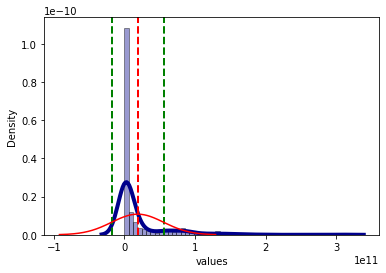

(18670968218.80597, 36922795617.4481)

In [7]:
distribution_analysis(mta_agg['ENTRIES'], fit_distribution='normal')

Log mean = 9.46(2874050183.39), mean = 18670968218.81
Standard deviation = 0.92
1 percentile = 18425964.44
5 percentile = 122186800.40
25 percentile = 662247994.00
50 percentile = 1948984320.00
75 percentile = 13666120216.00
95 percentile = 93253438104.20
99 percentile = 156339142653.00


/home/chriscarey/miniconda3/envs/pui/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


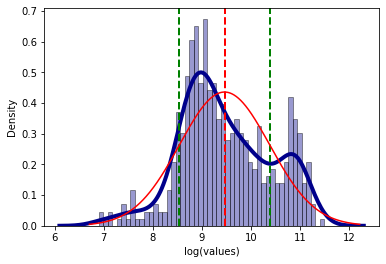

(9.458494347020055, 0.915656999825672)

In [8]:
distribution_analysis(mta_agg['ENTRIES'], fit_distribution='normal', log_scale=True)